## a)

In [8]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats

def binom_likelihood(p: float, tirada: np.ndarray):
    n_caras = np.sum(tirada)
    n = len(tirada)
    return stats.binom.pmf(n_caras, n, p)

def beta_prior(p_estimada: np.ndarray, alpha: float, beta: float):
    return stats.beta.pdf(p_estimada , alpha, beta)

def posterior_binomial(prior_funcion, n: int, k: int, samples: int):
    tirada = np.array([1] * k + [0] * (n - k))
    theta = np.linspace(0, 1, samples)
    likelihood = np.array([binom_likelihood(t, tirada) for t in theta])
    prior = prior_funcion(theta)
    posterior_normalizada = likelihood * prior / np.sum((likelihood * prior)[:-1] * np.diff(theta))
    return theta, posterior_normalizada


## b)

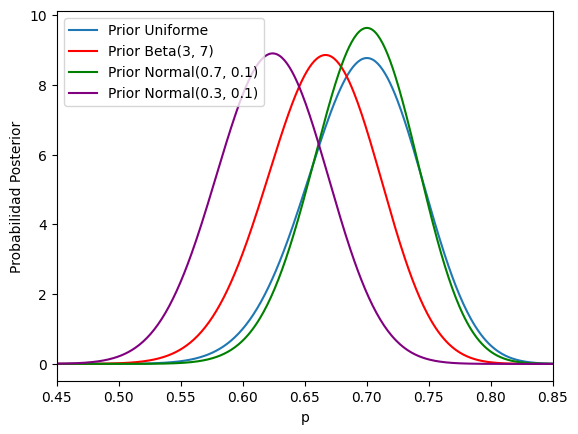

In [9]:
n = 100
k = 70
samples = 1000
# prior beta(1, 1) (uniforme)
prior_uniforme = lambda p_estimada: stats.beta.pdf(p_estimada , 1, 1)
plt.plot(*posterior_binomial(prior_uniforme, n, k, samples), label='Prior Uniforme')

# prior beta(3, 7)
prior_beta = lambda p_estimada: stats.beta.pdf(p_estimada , 3, 7)
plt.plot(*posterior_binomial(prior_beta, n, k, samples), label = "Prior Beta(3, 7)", color='red')

# prior normal(0.7, 0.1)
prior_normal = lambda p_estimada: stats.norm.pdf(p_estimada, 0.7, 0.1)
plt.plot(*posterior_binomial(prior_normal, n, k, samples), label = "Prior Normal(0.7, 0.1)", color='green')

# prior normal(0.5, 0.1)
prior_func_normal = lambda p_estimada: stats.norm.pdf(p_estimada, 0.3, 0.1)
plt.plot(*posterior_binomial(prior_func_normal, n, k, samples), label = "Prior Normal(0.3, 0.1)", color='purple')

plt.xlabel('p')
plt.ylabel('Probabilidad Posterior')
plt.xlim(0.45, 0.85)
plt.legend()
plt.show()


Aumentar la varianza hace que se acerque a la uniforme

## c)

Voy a probar con todos los priors

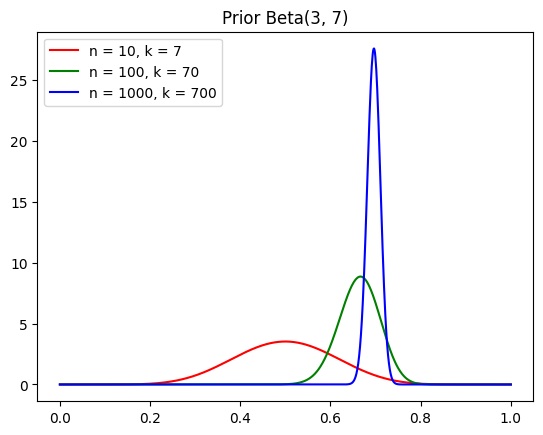

In [10]:
samples = 1000

plt.plot(*posterior_binomial(prior_beta, 10, 7, samples), label='n = 10, k = 7', color='red')
plt.plot(*posterior_binomial(prior_beta, 100, 70, samples), label='n = 100, k = 70', color='green')
plt.plot(*posterior_binomial(prior_beta, 1000, 700, samples), label='n = 1000, k = 700', color='blue')
plt.title("Prior Beta(3, 7)")
plt.legend()
plt.show()

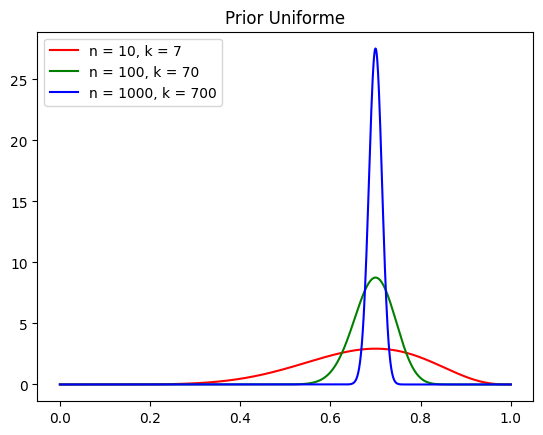

In [11]:
plt.plot(*posterior_binomial(prior_uniforme, 10, 7, samples), label='n = 10, k = 7', color='red')
plt.plot(*posterior_binomial(prior_uniforme, 100, 70, samples), label='n = 100, k = 70', color='green')
plt.plot(*posterior_binomial(prior_uniforme, 1000, 700, samples), label='n = 1000, k = 700', color='blue')
plt.title("Prior Uniforme")
plt.legend()
plt.show()


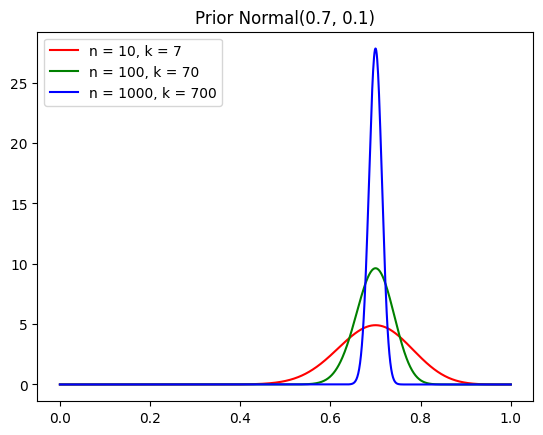

In [12]:
plt.plot(*posterior_binomial(prior_normal, 10, 7, samples), label='n = 10, k = 7', color='red')
plt.plot(*posterior_binomial(prior_normal, 100, 70, samples), label='n = 100, k = 70', color='green')
plt.plot(*posterior_binomial(prior_normal, 1000, 700, samples), label='n = 1000, k = 700', color='blue')
plt.title("Prior Normal(0.7, 0.1)")
plt.legend()
plt.show()

La probabilidad posterior se concentra en el valor real (o el de la data?) de p a medida que aumenta n

# 4)

## a) grafico

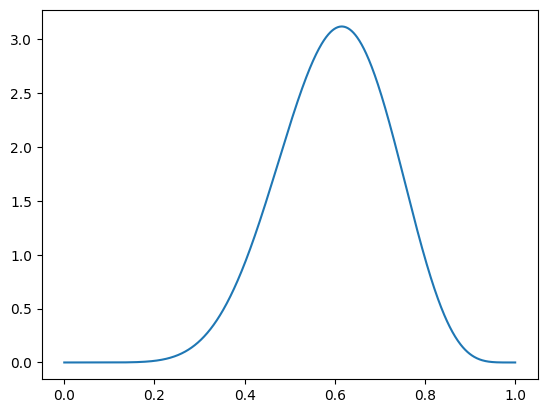

In [13]:
alpha = 9
beta = 6

x = np.linspace(0, 1, 1000)
y = stats.beta.pdf(x, alpha, beta)

plt.plot(x, y)
plt.show()

## b)

Con la funcion anterior:

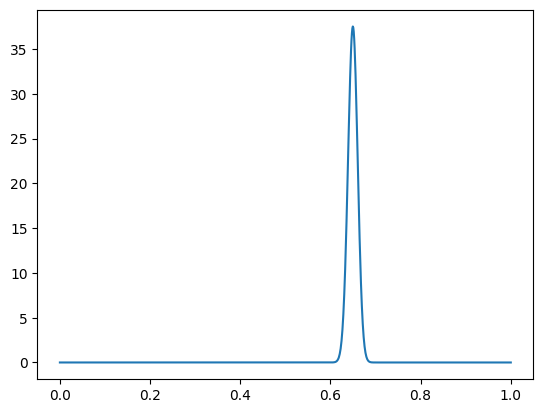

In [16]:
n = 1000
k = 650
samples = 1000
prior_beta = lambda p_estimada: stats.beta.pdf(p_estimada , alpha, beta)
plt.plot(*posterior_binomial(prior_beta, n, k, samples))
#plt.xlim(0.6, 0.7)
plt.show()

A mano en la hoja:

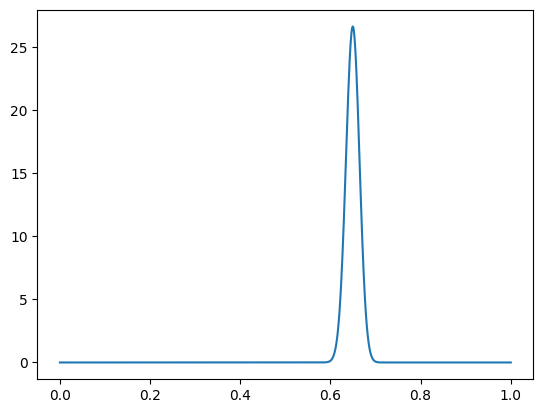

In [17]:
# Sin normalizar
alpha = 659
beta = 356

x = np.linspace(0, 1, 1000)
y = stats.beta.pdf(x, alpha, beta)

plt.plot(x, y)
# plt.xlim(0.6, 0.7)
plt.show()

Cuando aumenta la cantidad de observaciones disminuye la importancia de los alpha y beta originales (los del prior)